In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/worthiness-augmented/augmented_data2.csv
/kaggle/input/worthiness-augmented/augmented_data1.csv
/kaggle/input/check-worthiness-2021/CT21-AR-Dev-T1-Tweets.jsonl
/kaggle/input/check-worthiness-2021/CT21-AR-Train-T1-Labels.tsv
/kaggle/input/check-worthiness-2021/CT21-AR-Dev-T1-Labels.tsv
/kaggle/input/check-worthiness-2021/CT21-AR-Train-T1-Tweets.jsonl
/kaggle/input/checkworthiness/checkworthiness/CT22_arabic_1A_checkworthy_dev_test.tsv
/kaggle/input/checkworthiness/checkworthiness/CT22_arabic_1A_checkworthy_train.tsv
/kaggle/input/checkworthiness/checkworthiness/CT22_arabic_1A_checkworthy_dev.tsv


In [2]:
augmented=pd.read_csv("../input/worthiness-augmented/augmented_data1.csv")

In [3]:
def remove_unk(text):
    return text.replace('[UNK]','')

In [4]:
augmented['tweet_text']=augmented['tweet_text'].apply(lambda x:remove_unk(x))

In [5]:
train_21=pd.read_csv("../input/check-worthiness-2021/CT21-AR-Train-T1-Labels.tsv",sep='\t')
dev_21=pd.read_csv("../input/check-worthiness-2021/CT21-AR-Dev-T1-Labels.tsv",sep='\t')

In [6]:
train_21.tail()

,topic_id,tweet_id,tweet_url,tweet_text,claim,claim_worthiness
3434,CT20-AR-30,1229511354714927105,https://twitter.com/user/status/12295113547149...,#سفيه_الدوحه_وجزيه_المرتزقه ماكسر خاطري الا حم...,0,0
3435,CT20-AR-30,1229512831114108934,https://twitter.com/user/status/12295128311141...,انتصار جديد لـ #قطر وصفعة قاسية لدول الحصار ال...,0,0
3436,CT20-AR-30,1229513572633530368,https://twitter.com/user/status/12295135726335...,@alkhor_live @ama4425 الله اكبر هذا يعتبر اكبر...,0,0
3437,CT20-AR-30,1229529046930903040,https://twitter.com/user/status/12295290469309...,@Alg27010 @ramlo_ramlo غير تنضحك مع راملو ... ...,0,0
3438,CT20-AR-30,1229539125453295619,https://twitter.com/user/status/12295391254532...,قناة العربية : رئيس النظام السوري قناة الجزيرة...,1,0


In [7]:
train_21.rename(columns={'claim_worthiness':'class_label'},inplace=True)
dev_21.rename(columns={'claim_worthiness':'class_label'},inplace=True)

In [8]:
train_21.drop(columns={'claim'},inplace=True)
dev_21.drop(columns={'claim'},inplace=True)


In [9]:
train_21.head()

,topic_id,tweet_id,tweet_url,tweet_text,class_label
0,CT20-AR-01,1221949644554588160,https://twitter.com/user/status/12219496445545...,وأي خيانة أكبر من خيانة الدين ،، الوطن ،، الهو...,0
1,CT20-AR-01,1222030473385345028,https://twitter.com/user/status/12220304733853...,صباح الخير على فلسطين وقدسها وشعبها ومهجرينها ...,0
2,CT20-AR-01,1222035929105338368,https://twitter.com/user/status/12220359291053...,ذنبگ أنگ جميله گ يوسف وخانگ العالم گ أاخواته 💔...,0
3,CT20-AR-01,1222048121145962496,https://twitter.com/user/status/12220481211459...,لا يلزمك ان تكون فلسطينياً لتحب فلسطين، حُبها ...,0
4,CT20-AR-01,1222053294266372096,https://twitter.com/user/status/12220532942663...,#مناصرون رحل البروفسور زيك فريد فوغل . رئيس قس...,0


In [10]:
train=pd.read_csv('/kaggle/input/checkworthiness/checkworthiness/CT22_arabic_1A_checkworthy_train.tsv',sep='\t')
test=pd.read_csv('/kaggle/input/checkworthiness/checkworthiness/CT22_arabic_1A_checkworthy_dev_test.tsv',sep='\t')
dev=pd.read_csv('/kaggle/input/checkworthiness/checkworthiness/CT22_arabic_1A_checkworthy_dev.tsv',sep='\t')

In [11]:
def balanced_batch(data):
  harmful=data.loc[data["class_label"]==1]
  norm_count=int(len(harmful)*1.5)
  normal=data.loc[data["class_label"]==0].sample(n=norm_count)
  data=harmful.append(normal).sample(frac=1).reset_index(drop=True)
  return data

In [12]:
data=pd.concat([train])
test_data=pd.concat([test,dev])

In [13]:
# data=balanced_batch(data)

<AxesSubplot:xlabel='class_label', ylabel='count'>

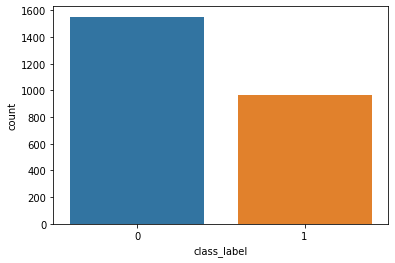

In [14]:
import seaborn as sns
sns.countplot(x='class_label', data=data)

Data preprocessing

In [15]:
# !git clone https://github.com/aub-mind/arabert


In [16]:
# from arabert.preprocess import ArabertPreprocessor

# model_name="aubmindlab/bert-base-arabertv01"
# arabert_prep = ArabertPreprocessor(model_name=model_name)

#data['tweet_text'] = data['tweet_text'].apply(lambda x:arabert_prep.preprocess(x))
#test['tweet_text'] = test['tweet_text'].apply(lambda x:arabert_prep.preprocess(x))
#dev['tweet_text'] = dev['tweet_text'].apply(lambda x:arabert_prep.preprocess(x))

In [17]:
test3=data['tweet_text'][4]
test4=data['tweet_text'][1]
print(test4)


غضب شعبي في قطر لتباطؤ الحكومة ضد فيروس كورونا    #حكومه_قطر_تنشر_كورونا https://t.co/B3Bxg7i4zR


In [18]:
from sklearn.model_selection import train_test_split
X_train = data.tweet_text.values
y_train = data.class_label.values

X_test = test_data.tweet_text.values
y_test=test.class_label.values

X_val=test_data.tweet_text.values
y_val=test_data.class_label.values

In [19]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,shuffle=True, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.1,shuffle=True, random_state=42)

In [20]:
#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel,TFAutoModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

In [21]:
tokenizer = BertTokenizerFast.from_pretrained('aubmindlab/bert-base-arabertv01')



Downloading:   0%|          | 0.00/762k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.57M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/379 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/576 [00:00<?, ?B/s]

In [22]:
token_lens_test = []

for txt in data['tweet_text'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))
    
max_len=np.max(token_lens_test)

In [23]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")


MAX TOKENIZED SENTENCE LENGTH: 133


In [24]:
MAX_LEN=150

In [25]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            pad_to_max_length = True,
            return_attention_mask=True,
            truncation=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [26]:
MAX_LEN2=175

In [27]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_val, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)



In [28]:
bert_model = TFAutoModel.from_pretrained('aubmindlab/bert-base-arabertv01')


Downloading:   0%|          | 0.00/708M [00:00<?, ?B/s]

2022-04-20 22:58:09.001216: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-20 22:58:09.002278: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-20 22:58:09.002986: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-20 22:58:09.003844: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [29]:
def create_model(bert_model,learning,max_len=MAX_LEN):
    
    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=learning)
    loss = 'binary_crossentropy'
    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    embeddings = bert_model([input_ids,attention_masks])[0]
    
    x=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True, dropout=0.3))(embeddings)
    x=tf.keras.layers.Dense(50, activation="relu")(x)
    avg_pool = tf.keras.layers.GlobalMaxPooling1D()(x)
    x=tf.keras.layers.Dropout(0.1)(avg_pool)
    output = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    model.compile(opt, loss=loss, metrics=['accuracy'])
    return model

In [30]:
#https://stackoverflow.com/a/45305384/5210098
from keras import backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val


In [31]:
model = create_model(bert_model,2e-5,MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 135193344   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 150, 256)     689664      tf_bert_model[0][0]          

In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard

tensorboard = TensorBoard(log_dir = 'logs')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', mode='auto',verbose=1)

2022-04-20 22:58:23.987265: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-04-20 22:58:23.987302: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-04-20 22:58:23.989289: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-04-20 22:58:24.455099: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-04-20 22:58:24.455311: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [33]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_val), epochs=4, batch_size=32,callbacks=[reduce_lr])

2022-04-20 22:58:24.908212: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/4


2022-04-20 22:58:41.393342: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


79/79 [==============================] - 73s 715ms/step - loss: 0.6911 - accuracy: 0.6041 - val_loss: 0.6638 - val_accuracy: 0.6177
Epoch 2/4
79/79 [==============================] - 53s 676ms/step - loss: 0.6126 - accuracy: 0.6737 - val_loss: 0.6321 - val_accuracy: 0.6663
Epoch 3/4
79/79 [==============================] - 53s 676ms/step - loss: 0.5557 - accuracy: 0.7123 - val_loss: 0.6515 - val_accuracy: 0.6328
Epoch 4/4
79/79 [==============================] - 53s 676ms/step - loss: 0.4892 - accuracy: 0.7628 - val_loss: 0.7636 - val_accuracy: 0.5356


In [34]:
result_bert = model.predict([test_input_ids,test_attention_masks])


In [35]:
resultat=[]
for i in range(len(result_bert)):
    resultat.append(result_bert[i])
    #resultat.append(result_bert[i])
    #resultat.append(result_bert2[i])

In [36]:
y_predicted=[]
for i in range(len(resultat)):
    if resultat[i]>0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [37]:
#y_predicted = np.where(result_bert> 0.5, 1, 0)


In [38]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()


In [39]:
y_test=test_data['class_label'].values

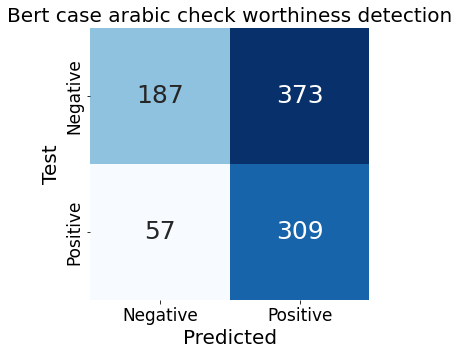

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_matrix(y_test, y_predicted,'Bert case arabic check worthiness detection')

In [41]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_predicted)
print("Accuracy :%5f" % (accuracy))

Accuracy :0.535637


In [42]:
from sklearn.metrics import f1_score
binf1=f1_score(y_test,y_predicted, average='binary')
print("F1-score binary :%5f" % (binf1))

F1-score binary :0.589695


In [43]:
from sklearn.metrics import f1_score
mic=f1_score(y_test,y_predicted, average='micro')
print("F1-score micro :%5f" % (mic))

F1-score micro :0.535637


In [44]:
from sklearn.metrics import f1_score
mac=f1_score(y_test,y_predicted, average='macro')
print("F1-score macro :%5f" % (mac))

F1-score macro :0.527434


In [45]:
from sklearn.metrics import recall_score
rec=recall_score(y_test, y_predicted, average='binary')
print(rec)

0.8442622950819673


In [46]:
from sklearn.metrics import precision_score
prec=precision_score(y_test, y_predicted, average='binary')
print(prec)

0.4530791788856305


In [47]:
# Configuration
lr= ' '
EPOCHS = 10
BATCH_SIZE = 32
MAX_LEN = 175

In [48]:
score = [{'MODEL': 'combined', 'Accuracy': accuracy,'Precision':prec,'Recall':rec, 'f1-score micro':mic, 'f1-score macro':mac,'epochs':EPOCHS,'batch_size':BATCH_SIZE,'sequence length':MAX_LEN,'learning-rate':'2e-6/3e-06','Preprocessing':0,'augmentation':0}]
score_f =pd.DataFrame(score)

In [49]:
score_f.to_csv("model_boosted_results.csv")